In [29]:
import seaborn as sns

from simulation import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
alpha = 1
n_roles = 10
n_persons = 1_000
n_simulations = 200
simulations = run_simulation(alpha=alpha, n_roles=n_roles, n_persons=n_persons, n_sims=n_simulations)


Simulations: 100%|██████████| 1000/1000 [06:56<00:00,  2.40it/s]


In [36]:
df = make_df(simulations)

In [37]:
df

,id,lambda,n_roles,n_persons,tvd,quota,success,total_util,g0_util,g1_util,total_util_perc,g0_util_perc,g1_util_perc
0,14544455,1,10,1000,0.096718,QuotaType.NONE,True,206.106400,90.055914,116.050486,1.000000,1.000000,1.000000
1,14544455,1,10,1000,0.096718,QuotaType.GTE20,True,205.957611,89.464336,116.493275,0.999278,0.993431,1.003815
2,14544455,1,10,1000,0.096718,QuotaType.GTE30,True,205.957611,89.464336,116.493275,0.999278,0.993431,1.003815
3,14544455,1,10,1000,0.096718,QuotaType.GTE40,True,205.790704,89.420176,116.370528,0.998468,0.992941,1.002758
4,14544455,1,10,1000,0.096718,QuotaType.EQU50,True,204.295836,92.714456,111.581380,0.991215,1.029521,0.961490
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,81028764,1,10,1000,0.567055,QuotaType.NONE,True,239.554937,131.346136,108.208801,1.000000,1.000000,1.000000
996,81028764,1,10,1000,0.567055,QuotaType.GTE20,True,237.553231,126.967113,110.586118,0.991644,0.966660,1.021970
997,81028764,1,10,1000,0.567055,QuotaType.GTE30,True,231.841434,122.227691,109.613742,0.967801,0.930577,1.012984
998,81028764,1,10,1000,0.567055,QuotaType.GTE40,True,222.308647,114.973393,107.335254,0.928007,0.875347,0.991927


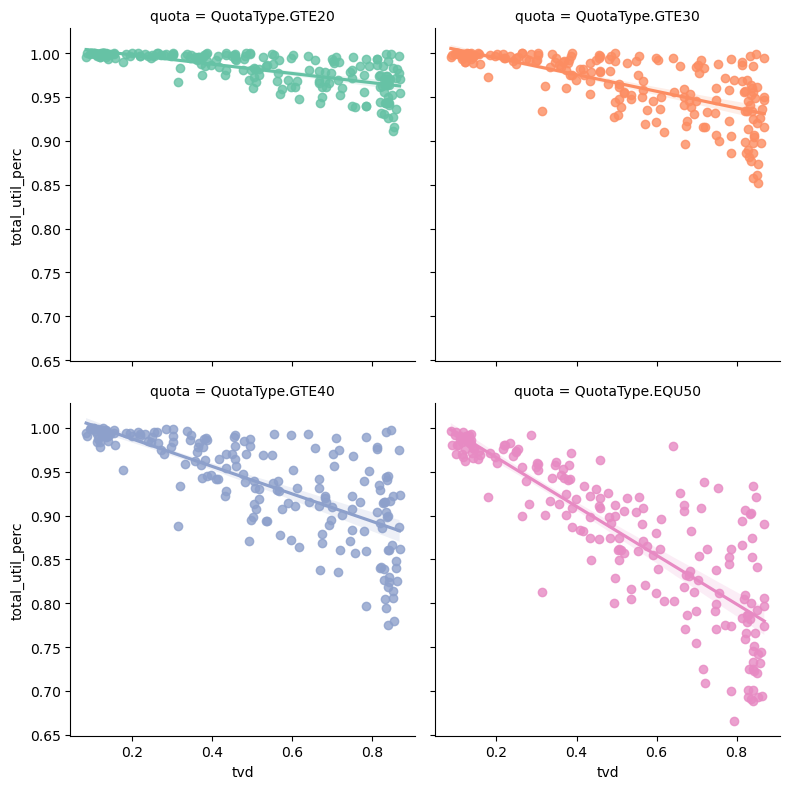

In [38]:
sns.lmplot(data=df.loc[df["quota"] != QuotaType.NONE], x="tvd", y="total_util_perc", hue="quota", palette="Set2", height=4, col="quota", col_wrap=2, aspect=1)

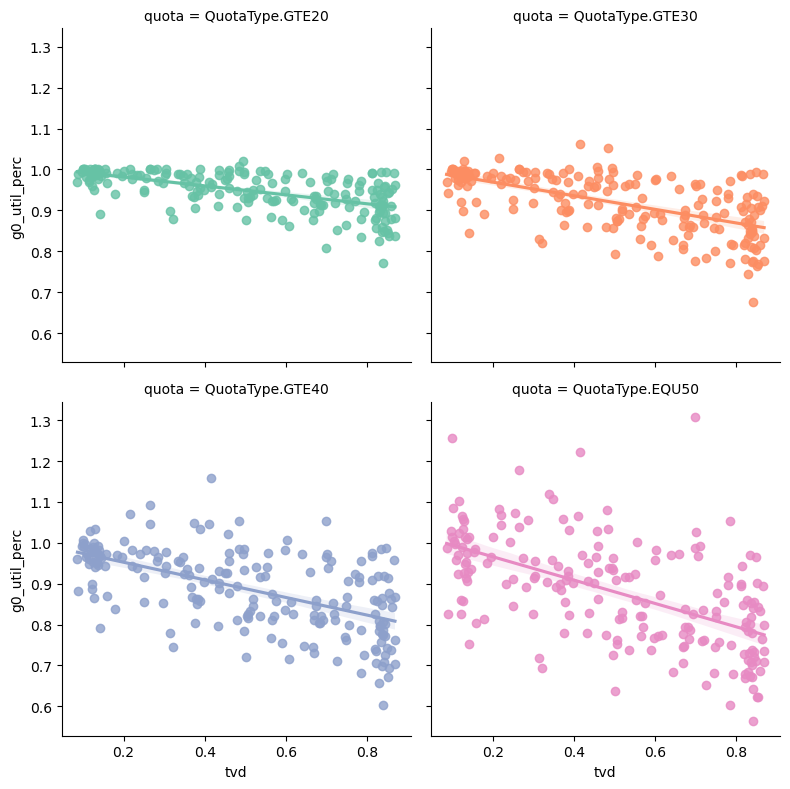

In [39]:
sns.lmplot(data=df.loc[df["quota"] != QuotaType.NONE], x="tvd", y="g0_util_perc", hue="quota", palette="Set2", height=4, col="quota", col_wrap=2, aspect=1)

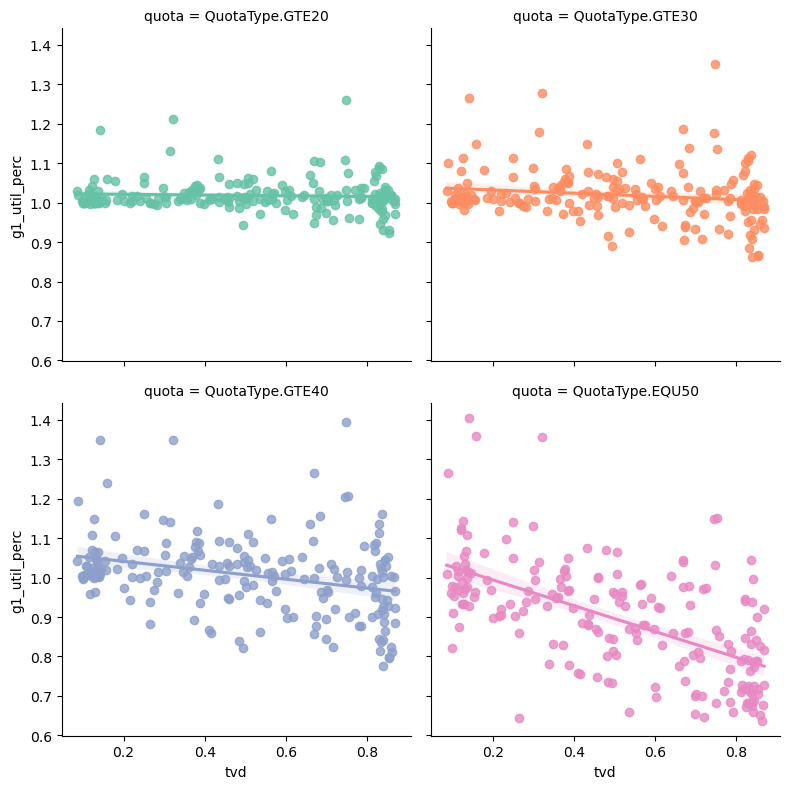

In [40]:
sns.lmplot(data=df.loc[df["quota"] != QuotaType.NONE], x="tvd", y="g1_util_perc", hue="quota", palette="Set2", height=4, col="quota", col_wrap=2, aspect=1)

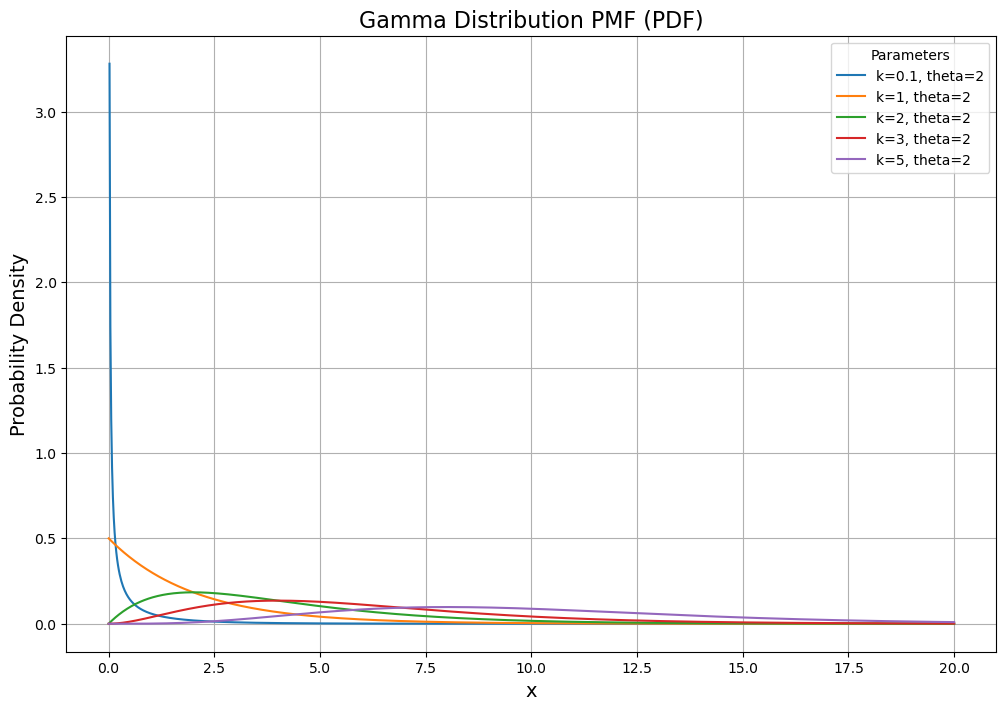

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gamma

# Define the parameters for the Gamma distribution
shape_params = [0.1, 1, 2, 3, 5]  # Shape parameters (k)
scale_params = [2]  # Scale parameters (theta)

# Create a grid for the x values
x = np.linspace(0, 20, 1000)

# Initialize the plot
plt.figure(figsize=(12, 8))

# Loop through each combination of shape and scale parameters
for k in shape_params:
    for theta in scale_params:
        # Compute the PMF (or PDF, as PMF is typically for discrete)
        pmf_values = gamma.pdf(x, a=k, scale=theta)

        # Plot the values
        sns.lineplot(x=x, y=pmf_values, label=f"k={k}, theta={theta}")

# Customize the plot
plt.title("Gamma Distribution PMF (PDF)", fontsize=16)
plt.xlabel("x", fontsize=14)
plt.ylabel("Probability Density", fontsize=14)
plt.legend(title="Parameters")
plt.grid(True)

# Show the plot
plt.show()

<Axes: >

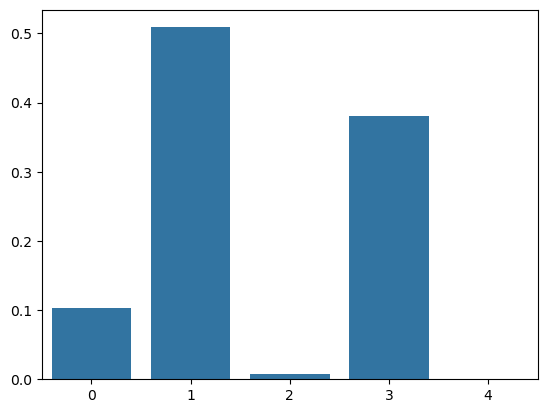

In [28]:
k = np.random.choice(len(simulations))
idx = np.random.choice(simulations[k].data.prefs.shape[0])
sns.barplot(simulations[k].data.prefs[idx])